# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [51]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator


from sklearn.decomposition import PCA

sns.set_theme(context="notebook", style="darkgrid")

%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import MDS
from sklearn.decomposition import PCA


In [52]:
#Load the dataset and explore its variables

data=pd.read_csv('snsdata.csv')
data.head()


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [54]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [55]:
data.shape

(30000, 40)

## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [56]:
data[data['age']>80]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
70,2006,NaN,106.686,24,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
78,2006,F,84.159,45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,2006,F,86.136,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
573,2006,F,106.261,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
710,2006,M,105.840,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29065,2009,F,95.296,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
29677,2009,F,106.801,67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29809,2009,F,106.130,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29922,2009,F,106.864,44,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
data['gender'].fillna('other',inplace=True)

In [58]:
data['gender']=np.where(data['gender']=='M',0,(np.where(data['gender']=='F',1,2)))
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,0,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,2,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [59]:
data.drop(columns='age',inplace=True)

In [60]:
data.dtypes

gradyear        int64
gender          int64
friends         int64
basketball      int64
football        int64
soccer          int64
softball        int64
volleyball      int64
swimming        int64
cheerleading    int64
baseball        int64
tennis          int64
sports          int64
cute            int64
sex             int64
sexy            int64
hot             int64
kissed          int64
dance           int64
band            int64
marching        int64
music           int64
rock            int64
god             int64
church          int64
jesus           int64
bible           int64
hair            int64
dress           int64
blonde          int64
mall            int64
shopping        int64
clothes         int64
hollister       int64
abercrombie     int64
die             int64
death           int64
drunk           int64
drugs           int64
dtype: object

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

In [61]:
for col in data.select_dtypes('number').columns:
    q25 = np.quantile(data[col], 0.25)
    q75 = np.quantile(data[col], 0.75)
    IQR = q75 - q25
    mask = (data[col] > (q75 + 3 * IQR)) | (data[col] < (q25 - 3 * IQR))
    out_data = data[mask]
out_data



,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
4,2006,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
57,2006,0,5,0,0,0,0,0,0,0,...,0,2,1,1,0,0,1,0,0,2
67,2006,1,35,0,0,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
102,2006,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
115,2006,0,43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29839,2009,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
29861,2009,1,38,1,0,0,1,1,0,5,...,0,0,4,0,1,1,1,0,2,1
29922,2009,1,44,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29966,2009,1,76,1,0,0,3,2,1,0,...,0,0,0,1,0,0,0,0,0,1


In [62]:
data.corr()

,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
gradyear,1.000000,0.030291,0.066851,0.072767,0.025213,0.058298,0.046433,0.061452,0.038754,0.042809,...,0.010269,0.074370,0.042722,0.039899,0.060011,0.055192,0.014776,0.001536,-0.021476,0.008931
gender,0.030291,1.000000,0.029511,-0.041451,-0.121875,-0.004117,0.053210,0.046415,0.025230,0.059131,...,0.009568,0.049139,0.119491,0.041793,0.033411,0.027661,-0.004006,-0.010014,-0.000865,-0.008935
friends,0.066851,0.029511,1.000000,0.053052,0.031738,0.027402,0.055935,0.046853,0.029147,0.054851,...,0.008502,0.066716,0.084627,0.026906,0.056240,0.057502,0.010432,0.026358,0.017036,-0.006960
basketball,0.072767,-0.041451,0.053052,1.000000,0.177333,0.071375,0.123884,0.136199,0.025810,0.041059,...,0.018204,0.069477,0.073422,0.076253,0.036633,0.033880,0.020331,0.017815,0.021744,0.031330
football,0.025213,-0.121875,0.031738,0.177333,1.000000,0.063986,0.046312,0.058534,0.035534,0.088658,...,0.033070,0.065207,0.056572,0.070793,0.063667,0.041708,0.023424,0.018757,0.038740,0.031675
soccer,0.058298,-0.004117,0.027402,0.071375,0.063986,1.000000,0.012366,0.029045,0.039001,0.014794,...,0.015134,0.022723,0.054580,0.022189,0.029353,0.022757,0.008942,0.004957,0.009390,0.014844
softball,0.046433,0.053210,0.055935,0.123884,0.046312,0.012366,1.000000,0.115052,0.020749,0.026927,...,0.006857,0.034093,0.050446,0.047182,0.024057,0.020079,0.012750,0.021312,0.008083,0.015096
volleyball,0.061452,0.046415,0.046853,0.136199,0.058534,0.029045,0.115052,1.000000,0.043515,0.023508,...,0.008077,0.035103,0.077030,0.030456,0.041156,0.043096,0.003543,0.014249,0.004995,0.014548
swimming,0.038754,0.025230,0.029147,0.025810,0.035534,0.039001,0.020749,0.043515,1.000000,0.023826,...,0.021183,0.045530,0.118624,0.071109,0.048956,0.056899,0.021548,0.017627,0.027838,0.032532
cheerleading,0.042809,0.059131,0.054851,0.041059,0.088658,0.014794,0.026927,0.023508,0.023826,1.000000,...,0.020405,0.060240,0.110205,0.054158,0.088120,0.076811,0.009243,0.009580,0.016172,0.023010


In [63]:
data.columns

Index(['gradyear', 'gender', 'friends', 'basketball', 'football', 'soccer',
       'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball',
       'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance',
       'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible',
       'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [64]:
clu_vars=['gradyear', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']
scaler = StandardScaler()
data_prep = pd.DataFrame(scaler.fit_transform(data[clu_vars]),columns=clu_vars)
data_prep

,gradyear,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-1.341641,-0.634528,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,-1.341641,-0.826150,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,-1.341641,1.062695,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,-1.341641,-0.826150,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,-1.341641,-0.552404,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.341641,-0.826150,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29996,1.341641,-0.798775,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29997,1.341641,-0.826150,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,1.715616,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29998,1.341641,-0.826150,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908


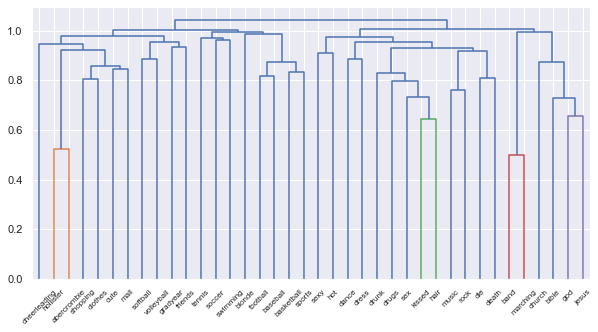

In [65]:
fig = plt.figure(figsize=(10, 5))
link = linkage(data_prep.T, method="complete", metric="cosine")
data_dendogram = dendrogram(link, labels=scaler.feature_names_in_)

In [66]:
data=data[~mask]
data

,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,0,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2006,1,142,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [67]:
data.head(3)

,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,0,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:

PCA_fit= PCA(n_components=2)
PCA_fit.fit(data_sca[clu_vars])

PCA(n_components=2)

In [69]:
data_pca=pd.DataFrame(PCA_fit.transform(data_sca[clu_vars]),columns=['pc1','pc2'])

<function matplotlib.pyplot.show(close=None, block=None)>

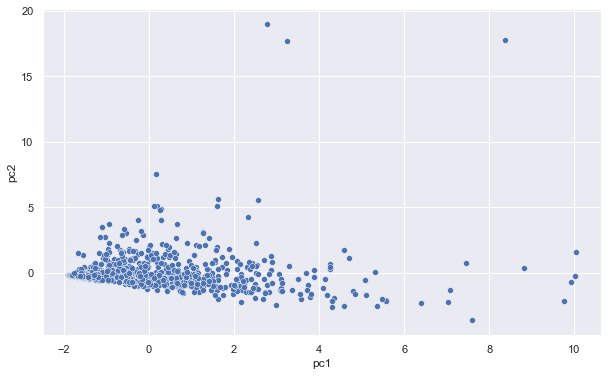

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_pca,x=data_pca['pc1'],y=data_pca['pc2'])
plt.show

In [71]:
clu_vars=['gradyear','gender', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']

In [72]:
sample=data_sca[clu_vars].sample(1000, random_state=42)

In [73]:
scaler = StandardScaler()
data_sca = pd.DataFrame(scaler.fit_transform(sample),columns=clu_vars)


In [75]:
mds_fit = MDS(n_components=2)

mds_array = mds_fit.fit_transform(data_sca)

data_mca = pd.DataFrame(
    mds_array,
    columns = ['MC_0', 'MC_1']
)

In [88]:
data_mca[['MC_0', 'MC_1']].head()

,MC_0,MC_1
521,-0.077953,0.659944
737,2.067132,-13.812486
740,-4.268064,-4.774195
660,0.806024,9.181879
411,15.610881,17.579013


<function matplotlib.pyplot.show(close=None, block=None)>

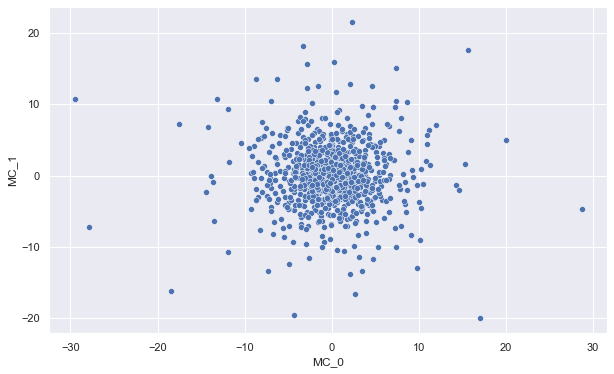

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_mca,x=data_mca['MC_0'],y=data_mca['MC_1'])
plt.show

## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

### AgglomerativeClustering

In [74]:
hc_fit = AgglomerativeClustering(n_clusters = 5, 
                                 affinity='euclidean', 
                                 linkage='ward')
hc_fit.fit(data_sca)
data_sca['clu_ward'] = [str(x) for x in hc_fit.labels_]
sample['clu_ward'] = [str(x) for x in hc_fit.labels_]


<AxesSubplot:xlabel='MC_0', ylabel='MC_1'>

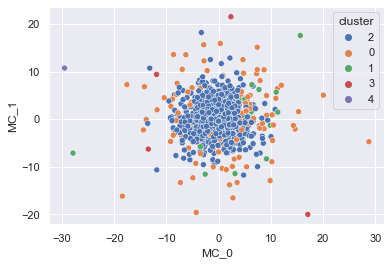

In [76]:
data_mca['cluster'] = [str(x) for x in hc_fit.labels_]
sns.scatterplot(data = data_mca, x = 'MC_0', y = 'MC_1', hue = 'cluster')

In [77]:

data_mca = pd.concat([sample, data_mca], axis = 1)


In [106]:
formelt2=data_sca.drop(columns='cluster_km')
formelt2

,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,clu_ward
0,-0.454990,0.113154,-0.847764,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.391829,-0.504371,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2
1,1.372278,2.098317,-0.847764,-0.357494,-0.357782,3.182474,-0.214263,-0.204954,0.785881,-0.22888,...,-0.391829,-0.504371,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2
2,0.458644,0.113154,-0.847764,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.391829,0.788888,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2
3,-0.454990,0.113154,0.490370,0.928456,-0.357782,-0.271731,1.263413,-0.204954,-0.141960,-0.22888,...,-0.391829,0.788888,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2
4,-1.368624,0.113154,-0.792008,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,0.987850,0.788888,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.458644,0.113154,1.995771,0.928456,1.045286,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,2.367529,-0.504371,1.580510,-0.201517,-0.187564,-0.205477,2.218378,-0.220152,0.0,2
996,-0.454990,0.113154,-0.819886,-0.357494,-0.357782,-0.271731,-0.214263,1.068050,-0.141960,-0.22888,...,-0.391829,-0.504371,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2
997,0.458644,0.113154,-0.652619,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.391829,-0.504371,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2
998,1.372278,0.113154,0.295226,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.391829,0.788888,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2


In [107]:
data_melt2 = formelt2.melt(id_vars = ['clu_ward'])
data_melt2.head()

,clu_ward,variable,value
0,2,gradyear,-0.454990
1,2,gradyear,1.372278
2,2,gradyear,0.458644
3,2,gradyear,-0.454990
4,2,gradyear,-1.368624


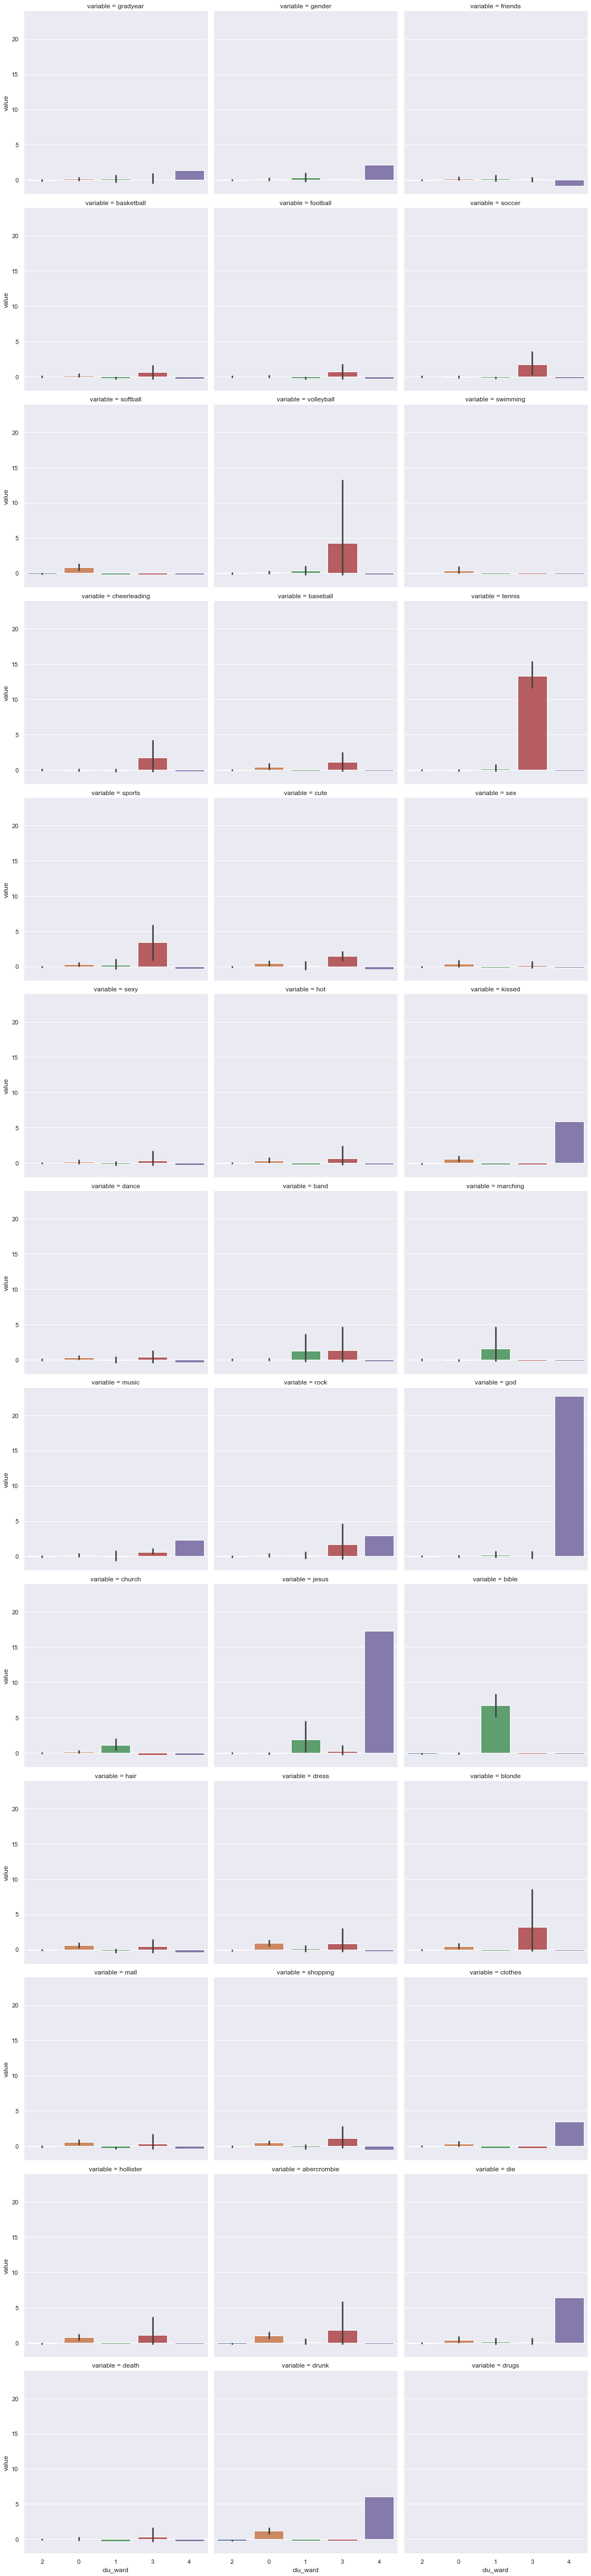

In [108]:
sns.catplot(data = data_melt2, x = 'clu_ward', y = 'value', col= 'variable', kind = 'bar', col_wrap = 3)

### Kmeans

In [97]:
km_fit = KMeans(n_clusters = 4)
km_fit.fit(data_sca)

KMeans(n_clusters=4)

In [98]:
data_sca['cluster_km'] = km_fit.labels_
sample['cluster_km'] = km_fit.labels_


In [99]:
formelt=data_sca.drop(columns='clu_ward')
formelt

,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster_km
0,-0.454990,0.113154,-0.847764,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.391829,-0.504371,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,0
1,1.372278,2.098317,-0.847764,-0.357494,-0.357782,3.182474,-0.214263,-0.204954,0.785881,-0.22888,...,-0.391829,-0.504371,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,0
2,0.458644,0.113154,-0.847764,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.391829,0.788888,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,0
3,-0.454990,0.113154,0.490370,0.928456,-0.357782,-0.271731,1.263413,-0.204954,-0.141960,-0.22888,...,-0.391829,0.788888,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,0
4,-1.368624,0.113154,-0.792008,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,0.987850,0.788888,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.458644,0.113154,1.995771,0.928456,1.045286,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,2.367529,-0.504371,1.580510,-0.201517,-0.187564,-0.205477,2.218378,-0.220152,0.0,2
996,-0.454990,0.113154,-0.819886,-0.357494,-0.357782,-0.271731,-0.214263,1.068050,-0.141960,-0.22888,...,-0.391829,-0.504371,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,0
997,0.458644,0.113154,-0.652619,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.391829,-0.504371,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,0
998,1.372278,0.113154,0.295226,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.391829,0.788888,-0.314586,-0.201517,-0.187564,-0.205477,-0.296790,-0.220152,0.0,0


In [100]:
data_melt = formelt.melt(id_vars = ['cluster_km'])
data_melt.head()

,cluster_km,variable,value
0,0,gradyear,-0.454990
1,0,gradyear,1.372278
2,0,gradyear,0.458644
3,0,gradyear,-0.454990
4,0,gradyear,-1.368624


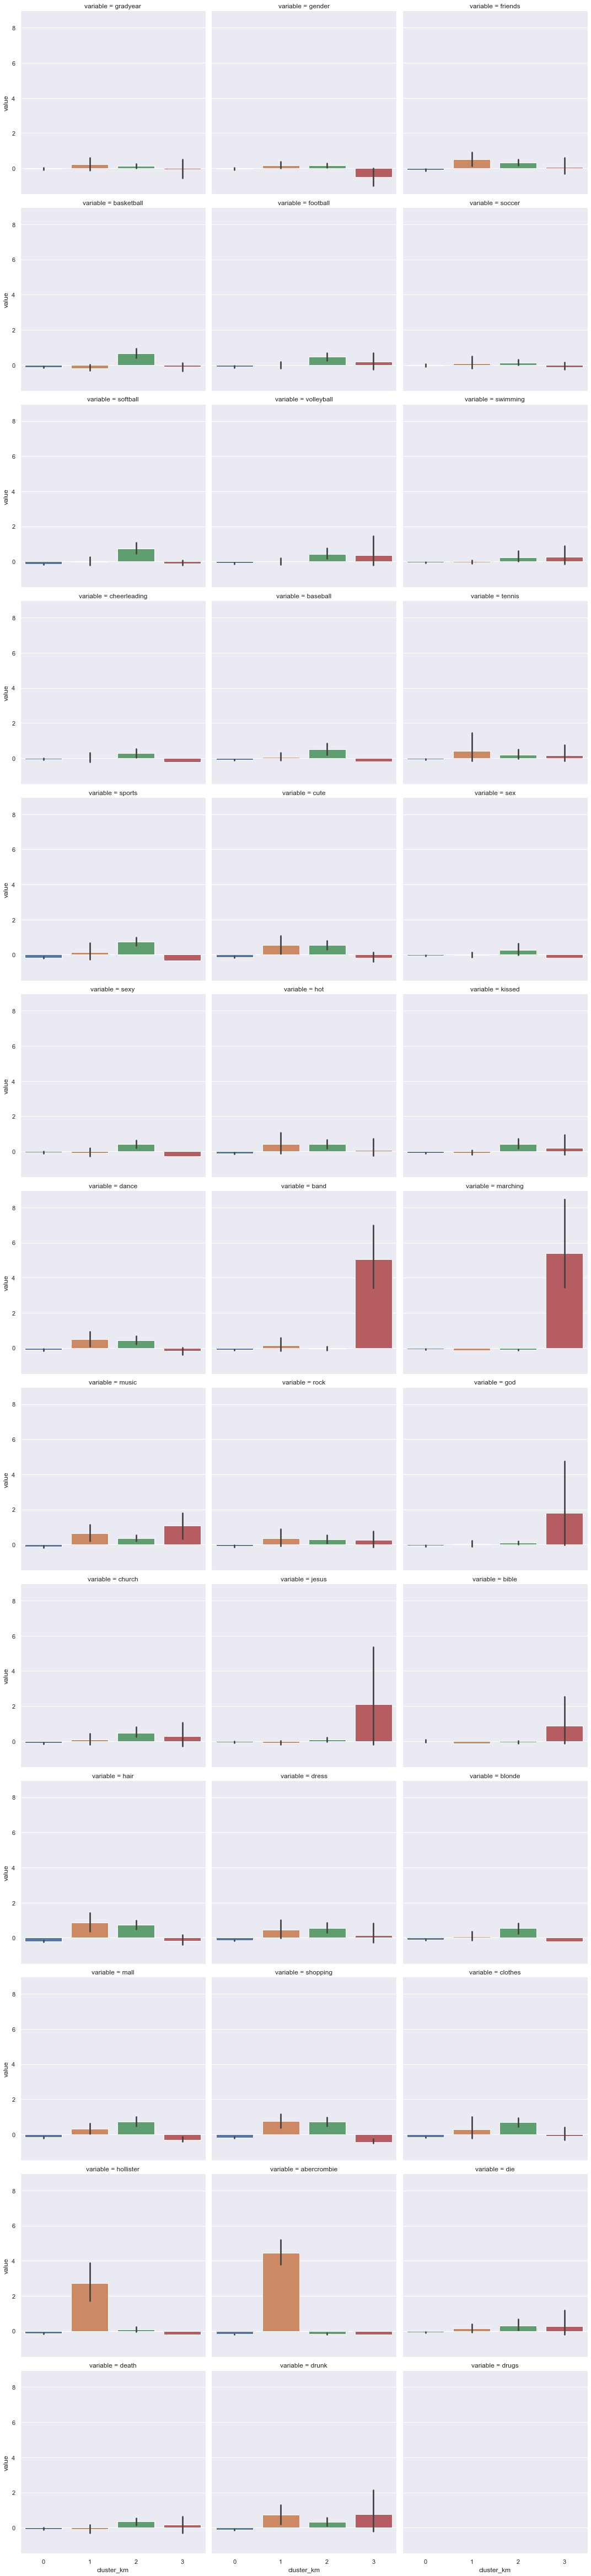

In [101]:
sns.catplot(data = data_melt, x = 'cluster_km', y = 'value', col= 'variable', kind = 'bar', col_wrap = 3)

In [102]:
data_mca

,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,abercrombie,die,death,drunk,drugs,clu_ward,MC_0,MC_1,cluster,cluster2
521,-0.454990,0.113154,-0.847764,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2,-0.077953,0.659944,2,0
737,1.372278,2.098317,-0.847764,-0.357494,-0.357782,3.182474,-0.214263,-0.204954,0.785881,-0.22888,...,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2,2.067132,-13.812486,0,0
740,0.458644,0.113154,-0.847764,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2,-4.268064,-4.774195,2,0
660,-0.454990,0.113154,0.490370,0.928456,-0.357782,-0.271731,1.263413,-0.204954,-0.141960,-0.22888,...,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2,0.806024,9.181879,0,0
411,-1.368624,0.113154,-0.792008,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2,15.610881,17.579013,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.458644,0.113154,1.995771,0.928456,1.045286,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.187564,-0.205477,2.218378,-0.220152,0.0,2,0.805394,0.459688,2,2
270,-0.454990,0.113154,-0.819886,-0.357494,-0.357782,-0.271731,-0.214263,1.068050,-0.141960,-0.22888,...,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2,3.565966,-0.677913,2,0
860,0.458644,0.113154,-0.652619,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2,3.634829,1.657679,2,0
435,1.372278,0.113154,0.295226,-0.357494,-0.357782,-0.271731,-0.214263,-0.204954,-0.141960,-0.22888,...,-0.187564,-0.205477,-0.296790,-0.220152,0.0,2,1.513349,-2.871189,2,0


<AxesSubplot:xlabel='MC_0', ylabel='MC_1'>

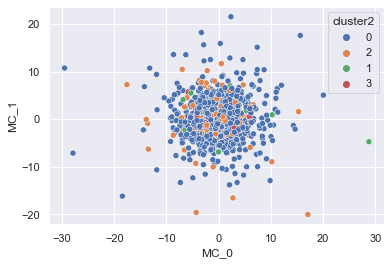

In [103]:
data_mca['cluster2'] = [str(x) for x in km_fit.labels_]
sns.scatterplot(data = data_mca, x = 'MC_0', y = 'MC_1', hue = 'cluster2')